<a href="https://colab.research.google.com/github/mint-aguccim/Machine_Learning_Programming/blob/main/4%EC%A3%BC%EC%B0%A8/wine_quality_white_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=";")
df  # print(df) 와 동일

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [30]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [31]:
# 타겟 단순화 (6 이상이면 "좋은 와인(1)", 아니면 "나쁜 와인(0)")
y = (y >= 6).astype(int)

Text(0.5, 1.0, 'Label')

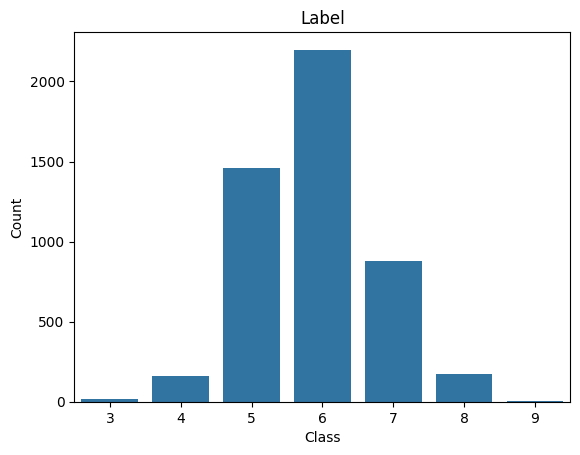

In [32]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="quality")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Label")


In [33]:
# 결측치 확인
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [34]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [35]:
df.columns  # 컬럼명 확인

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
# -----------------------------
# 2) 데이터 분할 & 정규화
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
# StandardScaler 적용 (모든 모델 공통)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# -----------------------------
# 3) 모델 정의
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [42]:
# -----------------------------
# 4) 학습 & 평가 (모든 모델에 스케일링 데이터 사용)
# -----------------------------
for name, model in models.items():
    # 모든 모델에 스케일링 적용
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"=== {name} Test Results ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if name == "Logistic Regression":
        print("기울기 (coef):", model.coef_)
        print("절편 (intercept):", model.intercept_)

    print("-" * 50)

=== Logistic Regression Test Results ===
Accuracy: 0.7408163265306122
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.48      0.56       328
           1       0.77      0.87      0.82       652

    accuracy                           0.74       980
   macro avg       0.71      0.68      0.69       980
weighted avg       0.73      0.74      0.73       980

기울기 (coef): [[-0.02062872 -0.64989607 -0.00237907  0.79910857  0.0047932   0.19060241
  -0.05958488 -0.68242054  0.1134096   0.19958335  0.99220347]]
절편 (intercept): [0.92767439]
--------------------------------------------------
=== KNN Test Results ===
Accuracy: 0.7571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.61       328
           1       0.80      0.85      0.82       652

    accuracy                           0.76       980
   macro avg       0.73      0.71      0.72       980